In [45]:
#importing libraries
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [46]:
#loading dataset
df=pd.read_csv('C:/Users/user/Downloads/owid-covid-latest.csv')
df.head(5)

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2022-09-18,197240.0,174.0,187.857,7795.0,1.0,1.143,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2022-09-18,12345472.0,162.0,1161.857,256668.0,1.0,5.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2022-09-18,331583.0,43.0,78.143,3586.0,0.0,0.286,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2022-09-18,270609.0,3.0,10.000,6879.0,0.0,0.000,...,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN
4,AND,Europe,Andorra,2022-09-18,46147.0,0.0,4.857,155.0,0.0,0.000,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN


# Data_Cleaning

In [47]:
df.isnull().sum().transpose() #checking missing values

iso_code                                     0
continent                                   13
location                                     0
last_updated_date                            0
total_cases                                  1
                                          ... 
human_development_index                     43
excess_mortality_cumulative_absolute       232
excess_mortality_cumulative                232
excess_mortality                           232
excess_mortality_cumulative_per_million    232
Length: 67, dtype: int64

In [48]:
df.columns #column_names

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [49]:
df.drop(df.columns[[0,3,10,11,12,13,14,15,18,20,22,21,23,24,25,26,27,28,29,30,31,32,33,40,41,42,43,44,45,46,47,62,66,65,64,63]],axis=1,inplace=True)
#columns with maximum 'NAN' values has been dropped. We can't really interprete much with these values

In [50]:
df1=df[df['continent'].isna()]
df1
#by comparing the two columns 'continent' and 'location' we can see few rows are completely irrelevant for example 'High income' can't be location also by looking at 'Africa' in 'location' we can interprete continent to be 'Africa' but not the place to compare. So it's better to drop these 13 rows

,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
1,NaN,Africa,12345472.0,162.0,1161.857,256668.0,1.0,5.143,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,Asia,183584372.0,153084.0,211258.143,1480906.0,282.0,413.143,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,Europe,226411359.0,84222.0,185184.571,1935189.0,165.0,561.857,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,European Union,165823982.0,25802.0,118383.714,1144121.0,56.0,412.429,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,High income,376701181.0,166684.0,381390.571,2657816.0,256.0,1246.714,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,International,721.0,0.0,0.000,15.0,0.0,0.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,Low income,2240445.0,221.0,435.143,47582.0,2.0,1.714,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,Lower middle income,95845987.0,12914.0,19242.286,1332904.0,85.0,122.714,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,North America,113451564.0,7792.0,69643.429,1506109.0,29.0,523.286,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,NaN,Oceania,12297202.0,1168.0,6255.429,19513.0,4.0,49.429,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_new=df.drop(df1.index) #creating new modified dataset
print(df_new.shape)


(219, 31)


In [52]:
df_new.isnull().sum() #checking for existence of any more missing values

continent                       0
location                        0
total_cases                     1
new_cases                       1
new_cases_smoothed              1
total_deaths                    5
new_deaths                      5
new_deaths_smoothed             5
reproduction_rate              26
icu_patients                  187
hosp_patients                 189
total_vaccinations            129
people_vaccinated             129
people_fully_vaccinated       129
total_boosters                138
new_vaccinations              165
new_vaccinations_smoothed     129
population                      0
population_density             13
median_age                     29
aged_65_older                  31
aged_70_older                  30
gdp_per_capita                 27
extreme_poverty                94
cardiovasc_death_rate          30
diabetes_prevalence            18
female_smokers                 73
male_smokers                   75
handwashing_facilities        125
hospital_beds_

In [53]:
df_new.fillna(0,inplace=True) #replacing missing values by 0

In [54]:
df_new.info() #checking for types of the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 231
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   continent                   219 non-null    object 
 1   location                    219 non-null    object 
 2   total_cases                 219 non-null    float64
 3   new_cases                   219 non-null    float64
 4   new_cases_smoothed          219 non-null    float64
 5   total_deaths                219 non-null    float64
 6   new_deaths                  219 non-null    float64
 7   new_deaths_smoothed         219 non-null    float64
 8   reproduction_rate           219 non-null    float64
 9   icu_patients                219 non-null    float64
 10  hosp_patients               219 non-null    float64
 11  total_vaccinations          219 non-null    float64
 12  people_vaccinated           219 non-null    float64
 13  people_fully_vaccinated     219 non

In [55]:
df_new.columns #column names of our new dataframe

Index(['continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'new_vaccinations_smoothed', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy'],
      dtype='object')

In [56]:
#modifying new dataframe
df_new['senior_citizen(>65)']=df['aged_65_older']+df['aged_70_older']
df_new['hospital_beds']=df_new['hospital_beds_per_thousand']*1000
df_new.drop(['aged_65_older', 'aged_70_older', 'hospital_beds_per_thousand'],axis=1,inplace=True)

In [57]:
#renaming column
df_new=df_new.rename(columns={'location': 'country'})

In [58]:
#resetting index
df_new=df_new.reset_index(drop=True)
df_new.head()


,continent,country,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,senior_citizen(>65),hospital_beds
0,Asia,Afghanistan,197240.0,174.0,187.857,7795.0,1.0,1.143,1.06,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,64.83,3.918,500.0
1,Europe,Albania,331583.0,43.0,78.143,3586.0,0.0,0.286,0.59,0.0,...,11803.431,1.1,304.195,10.08,7.1,51.2,0.000,78.57,21.831,2890.0
2,Africa,Algeria,270609.0,3.0,10.000,6879.0,0.0,0.000,0.48,3.0,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,76.88,10.068,1900.0
3,Europe,Andorra,46147.0,0.0,4.857,155.0,0.0,0.000,0.63,0.0,...,0.000,0.0,109.135,7.97,29.0,37.8,0.000,83.73,NaN,0.0
4,Africa,Angola,103131.0,0.0,0.000,1917.0,0.0,0.000,0.02,0.0,...,5819.495,0.0,276.045,3.94,0.0,0.0,26.664,61.15,3.767,0.0


So, now our data looks good with no null value. And our data has 2 categorical, 28 numerical variable. Let's proceed our work further.

In [59]:

df_new.to_excel(r'C:\Users\user\Downloads\covid_19.xlsx',index= False) 
#converted the dataset to excel file to make dashboard using different platform

# Summary Statistics

In [60]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_cases,219.0,2.793946e+06,8.815068e+06,0.00,27417.5000,230219.000,1.271126e+06,9.565824e+07
new_cases,219.0,2.350256e+03,7.846169e+03,0.00,0.0000,14.000,6.830000e+02,6.400900e+04
new_cases_smoothed,219.0,2.278639e+03,9.225898e+03,0.00,2.0715,21.857,5.649285e+02,7.675543e+04
total_deaths,219.0,2.979879e+04,1.020218e+05,0.00,219.0000,2563.000,1.543550e+04,1.053419e+06
new_deaths,219.0,9.799087e+00,3.705730e+01,0.00,0.0000,0.000,2.000000e+00,4.460000e+02
new_deaths_smoothed,219.0,8.039799e+00,3.403763e+01,0.00,0.0000,0.143,2.286000e+00,4.272860e+02
reproduction_rate,219.0,6.188584e-01,4.632703e-01,-0.09,0.0850,0.650,9.900000e-01,1.780000e+00
icu_patients,219.0,3.368037e+01,2.419218e+02,0.00,0.0000,0.000,0.000000e+00,3.238000e+03
hosp_patients,219.0,4.221096e+02,2.579560e+03,0.00,0.0000,0.000,0.000000e+00,2.546800e+04
total_vaccinations,219.0,4.828720e+07,2.817016e+08,0.00,0.0000,0.000,8.394176e+06,3.435302e+09


### Covariance and correlation
Covariance is  basically a measure of how much two random variables change together.
The correlation coefficient is the specific measure that quantifies the strength of the linear relationship between two variable in a correlation analysis

In [61]:
corr_df=df_new.copy()
corr_df.drop(corr_df.columns[[4,7,9,12,13,14,15,16,18,21,29]],axis=1,inplace=True)

As our dataset has many columns if we try to find correlation between all 28 variables it will be waste of time. Because few vaiables are si ilar type. So, we filtered our data before proceeding to correlation calculation

<AxesSubplot:>

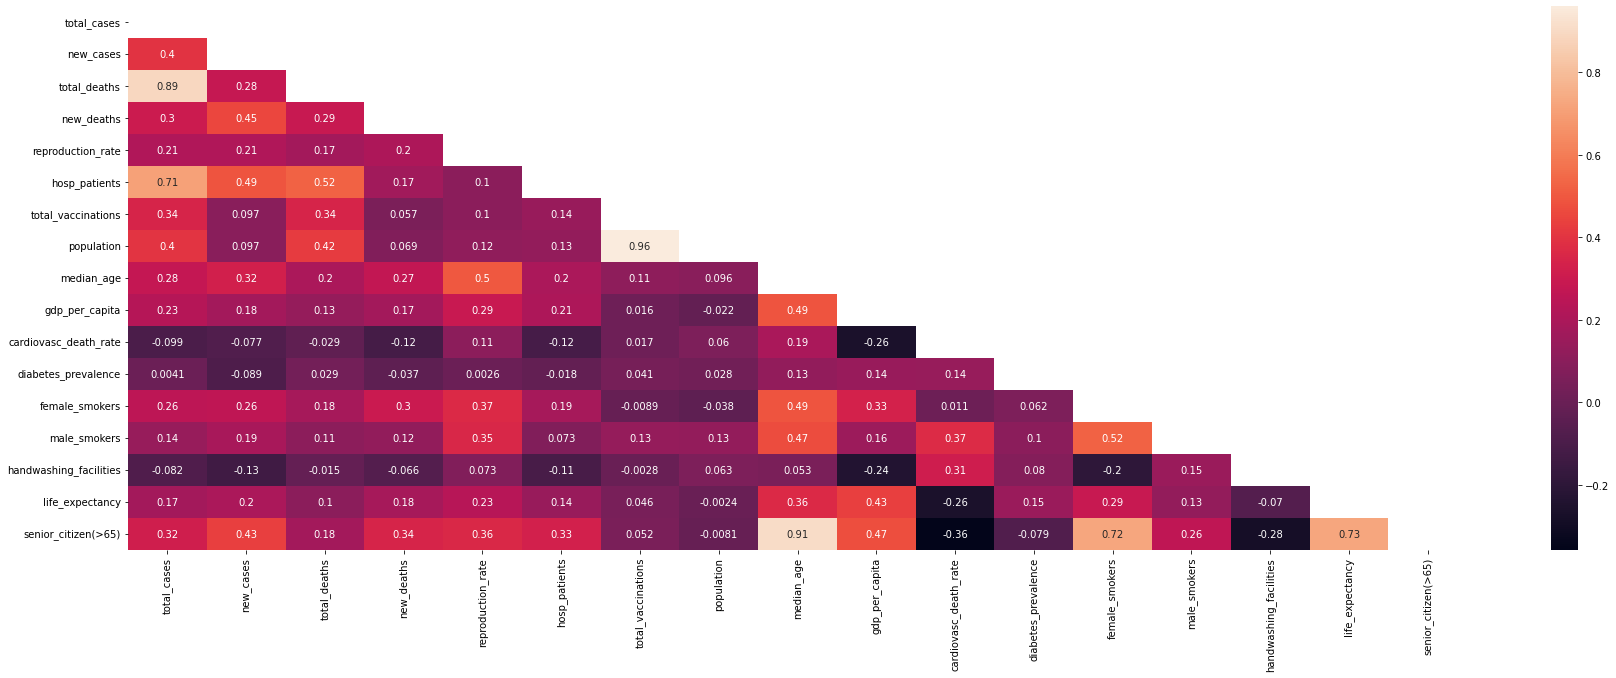

In [62]:

mask=np.triu(np.ones_like(corr_df.corr(),dtype=bool))
plt.figure(figsize=(30,10))
sns.heatmap(corr_df.corr(),mask=mask,annot=True) #correlation matrix

Here, we can see many variables are highly correlated for example 'population-total_vaccination' whereas few are highly uncorrelated .

# Plotting

In [63]:
fig=px.scatter(df_new, x= 'country',y= 'new_cases',color='continent',facet_col='continent',title='New cases according countries')
fig.show()

In [64]:
fig=px.scatter(df_new, x= 'country',y= 'total_deaths',color='continent',facet_col='continent',title='Death rate according countries')
fig.show()

In [65]:
fig=px.scatter_3d(df_new, z= 'population_density',y= 'total_cases',x='total_deaths',color='continent',hover_name='country',title='New cases and deaths rate in various countries')
fig.show()

In [69]:
fig=px.scatter(df_new, x= 'population_density',y= 'reproduction_rate',color='country',facet_col='continent',title='Reproduction rate according countries')
fig.show()

In [72]:
fig=px.bar(df_new, x= 'median_age',y= 'total_cases',color='continent',title='Numer of cases based on age group',hover_name='country')
fig.show()

In [71]:
fig=px.pie(df_new, names='continent',values='life_expectancy',title='Expectancy of life of different continents')
fig.show()

### conclusion: 

1. Cases are increasing in 'JAPAN' most, among all the countries of evry continent, whereas few countries have no cases.

2. Highest death rate has been found in 'United States'of North America. High population density can be a reason behind it.
3. Reproduction rate is highest in Austria of Europe.
4. People between 35-40 age group are being affected most.
5. Expectancy of life has been found high in 'Europe' and 'Asia'. 

